# Numerical Method in finance to differentiate and integrate

The objective of this repo is combine mathematical derivation, python implementation and motivating examples for the following methods. For differentiation we will compare speed and storage to solve the Black-Scholes PDE for options pricing

## Numerical Differentiation Methods

There are plenty of numerical differentiation method here we will focus on some of them and provide a the strengh and weaknesses. We will compare speed and storage to solve the Black-Scholes PDE for options pricing.
We will focus on the following method:

- Explicit finite difference method
- Implicit finite difference method
- Crank Nicolson method
- Douglas schemes

### Explicit finite difference method

#### Introduction on finite difference methods
Finite difference methods comes as an alternative for Monte Carlo simulation for low dimmension (n<5). This method is very similar to binomial tree method but offers more results. To understand it, we use grids or meshes. The will first explain though the example of Black-Scholes PDE for pricing options;

Recall the equation:
$$\frac{\partial V}{\partial t} + \frac{1}{2} \sigma^2 S^2 \frac{\partial^2 V}{\partial S^2} + r S \frac{\partial V}{\partial S} - r V = 0
$$

For Generalization purposes, we will solve for the equation:
$$\frac{\partial V}{\partial t} + a(S,t) \frac{\partial^2 V}{\partial S^2} + b(S,t) \frac{\partial V}{\partial S} - c(S,t) V = 0


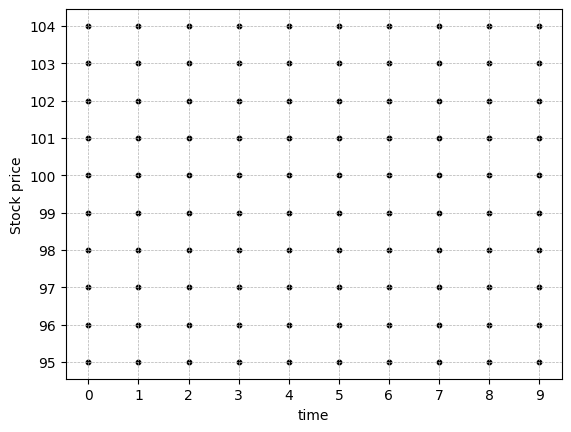

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, 10, 1)
y = np.arange(95, 105, 1)

X, Y = np.meshgrid(x, y)

plt.scatter(X, Y, color='black', s=10)

plt.grid(True, linestyle='--', linewidth=0.5)

plt.xticks(x)
plt.yticks(y)
plt.xlabel('Time')
plt.ylabel('Stock price')
plt.show()    

Using the grid we can differentiate: Let's set notations: time step is $\delta t$ and asset step $\delta S$.  
For $0 ≤ i ≤ I$ we have $S = i \delta S$  
For $0 ≤ k ≤ K$ we have $t = T - k\delta t$  
We write $V_i^k = V(i\delta S,T - k\delta t)$
The whole challenge is to formally rewrite the BS PDE we differentiating the terms. See above how these notations fit in the grid

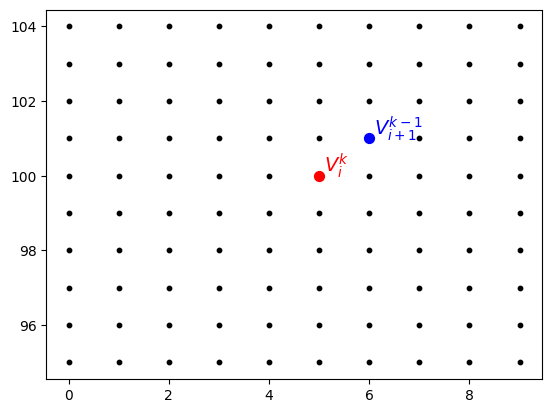

In [32]:
special_x, special_y = 5, 100
special_x2, special_y2 = 6, 101

plt.scatter(X, Y, color='black', s=10)

plt.scatter(special_x, special_y, color='red', s=50)
plt.scatter(special_x2, special_y2, color='blue', s=50)

# Add a label next to the special point
plt.text(special_x + 0.1, special_y + 0.1, r"$V_i^k$", fontsize=14, color='red')
plt.text(special_x2 + 0.1, special_y2 + 0.1, r"$V_{i+1}^{k-1}$", fontsize=14, color='blue')
plt.show()

Now that we've introduced the notations, we will see why the grid is usefull in our context of PDE solving.

#### Approximation of $\frac{\partial V}{\partial S}$ or $\Delta$
First we can approximate the derivative with 3 methods:
- Backward difference
$$\frac{\partial V}{\partial S} \approx \frac{V_{i+1}^{k} - V_{i}^{k}}{\delta t}$$
- Forward difference
$$\frac{\partial V}{\partial S} \approx \frac{V_{i}^{k} - V_{i-1}^{k}}{\delta t}$$
- Central diffenrece (most accurate)
$$\frac{\partial V}{\partial S} \approx \frac{V_{i+1}^{k} - V_{i-1}^{k}}{\delta 2t}$$


We can demonstrate easily with Taylor serie that the central difference approximation has on error of $O(\delta S^2)$, whereas the backward and forward have $O(\delta S)$. For $\frac{\partial V}{\partial t}$ we can't use the Central difference as we would need to know futur as well as past values where we are trying to determinate one of them.

#### Approximation of $\frac{\partial^2 V}{\partial S^2}$ or $\Gamma$

Using Backward and Forward difference Method we can get:

$$\frac{\partial^2 V}{\partial S^2} \approx \frac{\frac{V_{i+1}^{k} - V_{i}^{k}}{\delta t} - \frac{V_{i}^{k} - V_{i-1}^{k}}{\delta t}}{\delta S^2}$$ 
$$\frac{\partial^2 V}{\partial S^2} \approx \frac{V_{i+1}^{k}-2V_{i}^{k}+V_{i-1}^{k}}{{\delta S^2}}$$ 


This approximation has on error of $O(\delta S^2)$ as the Taylor serie suggests.

#### Final Conditions anf payoffs

To get the last values in the grids t=T  of have to define condition, this condition will get our sheme started:
$$ V(S,T) = Payoff(S) $$
In our notation scheme
$$ V_i^0 = Payoff(i\delta S) $$

Where Payoff is a known function, it can be adapted to any options. For example, we will price european call option (E our stike) we will thus have:

$$V_i^0 = max(i\delta S - E, 0)$$

### Explicit Difference method

#### Approximation of $\frac{\partial V}{\partial t}$ or $\theta$
First we can approximate the derivative:

$$\frac{\partial V}{\partial t} = \lim_{h \to 0}  \frac{V(S,t)-V(S,t-h)}{h}$$

In our grid:

$$\frac{\partial V}{\partial t} \approx \frac{V_{i}^{k} - V_{i}^{k+1}}{\delta t}$$

This approximation has on error of $O(\delta t)$ as the Taylor serie suggests.

#### Writing the Problem

Following what've written and defined we will now write the equation as

$$\frac{\partial V}{\partial t} + \frac{V_{i}^{k} - V_{i}^{k+1}}{\delta t} + a_i^k \frac{V_{i+1}^{k}-2V_{i}^{k}+V_{i-1}^{k}}{\delta S^2} + b_i^k \frac{V_{i+1}^{k} - V_{i-1}^{k}}{2\delta t} + c_i^k V_i^k = O(\delta t, \delta S^2)$$

Which can be rearranged to the following:

$$V_{i}^{k+1}=A_i^k V_{i+1}^{k}+B_i^k V_{i}^{k}+C_i^k V_{i-1}^{k}$$

It is called Explicit because you compute the solution at the next time step directly from the known values at the current time step!

Grid wise we can plot the following which help to understand:

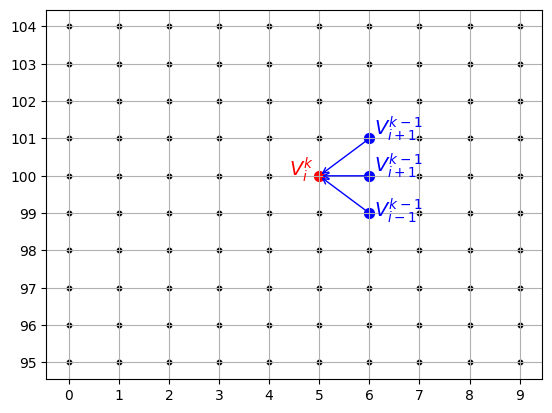

In [55]:
special_x, special_y = 5, 100

X, Y = np.meshgrid(x, y)
plt.scatter(X, Y, color='black', s=10)

plt.scatter(special_x, special_y, color='red', s=50)
plt.scatter(special_x +1, special_y, color='blue', s=50)
plt.scatter(special_x +1, special_y + 1, color='blue', s=50)
plt.scatter(special_x +1, special_y - 1, color='blue', s=50)

plt.text(special_x - 0.6, special_y , r"$V_i^k$", fontsize=14, color='red')
plt.text(special_x + 1.1, special_y + 0.1, r"$V_{i+1}^{k-1}$", fontsize=14, color='blue')
plt.text(special_x + 1.1, special_y + 1.1, r"$V_{i+1}^{k-1}$", fontsize=14, color='blue')
plt.text(special_x + 1.1, special_y - 1.1, r"$V_{i-1}^{k-1}$", fontsize=14, color='blue')


plt.annotate('', xy=(special_x + 1, special_y), xytext=(special_x, special_y),
             arrowprops=dict(arrowstyle='<-', lw=1., color='blue'))
plt.annotate('', xy=(special_x + 1, special_y + 1), xytext=(special_x, special_y),
             arrowprops=dict(arrowstyle='<-', lw=1., color='blue'))
plt.annotate('', xy=(special_x + 1, special_y - 1), xytext=(special_x, special_y),
             arrowprops=dict(arrowstyle='<-', lw=1., color='blue'))

plt.xticks(x)
plt.yticks(y)
plt.grid()
plt.show()

Ok, now that we've understood the method let's actually code it, and face a missing part:

In [87]:
# for a european call option
E = 100
ds = 2
dt = 1
vol = 0.2
r = 0.05
T = 20

# payoff function
def payoff(x):
    return np.maximum(0, x - E)

In [88]:
import pandas as pd
# initiating the grid

t = np.arange(0, T, dt)
s = np.arange(90, 130, ds)

grid = np.zeros((len(t), len(s)))
grid = pd.DataFrame(grid, index=s, columns=np.around(t, 3))

# initial condition
grid.iloc[:, -1] = payoff(s)

# Fill the grid
for i in range(len(t) - 2, -1, -1):
    for j in range(1, len(s) - 1):
        grid.iloc[j, i] = np.exp(-r * dt) * (0.5 * vol**2 * (grid.iloc[j + 1, i + 1] - 2 * grid.iloc[j, i + 1] + grid.iloc[j - 1, i + 1]) / ds**2 +
                                             (r * grid.iloc[j, i + 1] - vol**2 / 2) * (grid.iloc[j + 1, i + 1] - grid.iloc[j - 1, i + 1]) / (2 * ds))
    # Set the boundary conditions
    grid.iloc[0, :] = 0
    grid.iloc[-1, :] = s[-1] - E * np.exp(-r * (T - t))

# Plotting the grid
print(np.around(grid,2))


        0      1      2      3      4      5      6      7      8      9   \
90    0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   
92    0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   
94    0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   
96    0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   
98    0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   
100   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   
102   0.00  -0.00   0.00  -0.00   0.00  -0.00   0.00  -0.00   0.00  -0.00   
104  -0.00   0.00  -0.00   0.00  -0.00   0.00  -0.00   0.00  -0.00   0.00   
106   0.00  -0.00   0.00  -0.00   0.00  -0.00   0.00  -0.00   0.00  -0.00   
108  -0.00   0.00  -0.00   0.00  -0.00   0.00  -0.00   0.00  -0.00   0.00   
110   0.00  -0.00   0.00  -0.00   0.00  -0.00   0.00  -0.00   0.00  -0.00   
112  -0.00   0.00  -0.00   0.00  -0.00   0.00  -0.00   0.00  -0.00   0.00   

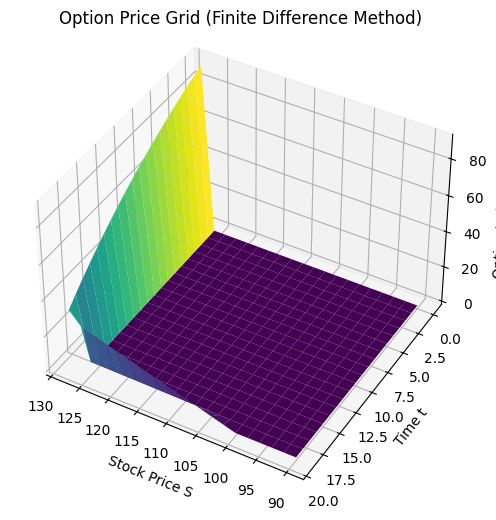

In [91]:
# 3D Plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

S, T_ = np.meshgrid(grid.index, grid.columns)  # x = stock price, y = time
ax.plot_surface(S, T_, grid.T.values, cmap='viridis')

ax.set_xlabel('Stock Price S')
ax.set_ylabel('Time t')
ax.set_zlabel('Option Value V(S,t)')
ax.set_title('Option Price Grid (Finite Difference Method)')
ax.view_init(elev=40, azim=120) 

plt.show()